# Predictive Analytics

## Data Loading

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "ichsannuriman"
os.environ['KAGGLE_KEY'] = "e20dd538318e3a23d0bbfdf1e29fbdb8"

In [2]:
!kaggle datasets download -d teertha/ushealthinsurancedataset

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 15.2MB/s]


In [3]:
!unzip -q ushealthinsurancedataset.zip -d .

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## Data Understanding

### Deskripsi Variabel

In [5]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Informasi Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Deskripsi Statistik Data

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Melihat Missing Values

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Univariate Analysis

In [10]:
categorical = ['sex','smoker', 'region']

numerical = ['age','children','bmi','charges']

### Categorical Features

        jumlah sampel  persentase
male              676        50.5
female            662        49.5


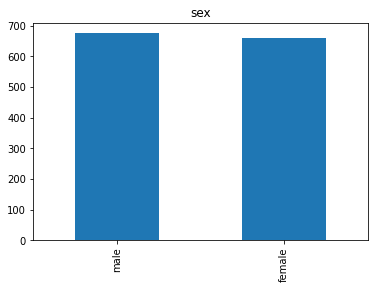

In [11]:
feature = categorical[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
no            1064        79.5
yes            274        20.5


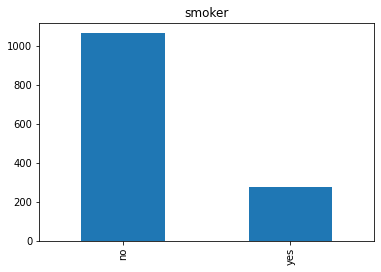

In [12]:
feature = categorical[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

           jumlah sampel  persentase
southeast            364        27.2
northwest            325        24.3
southwest            325        24.3
northeast            324        24.2


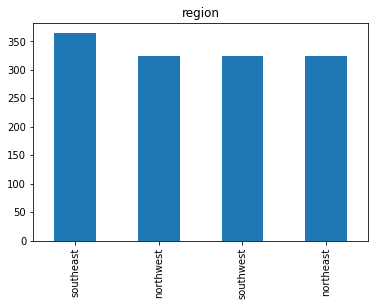

In [13]:
feature = categorical[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

### Numerical Features

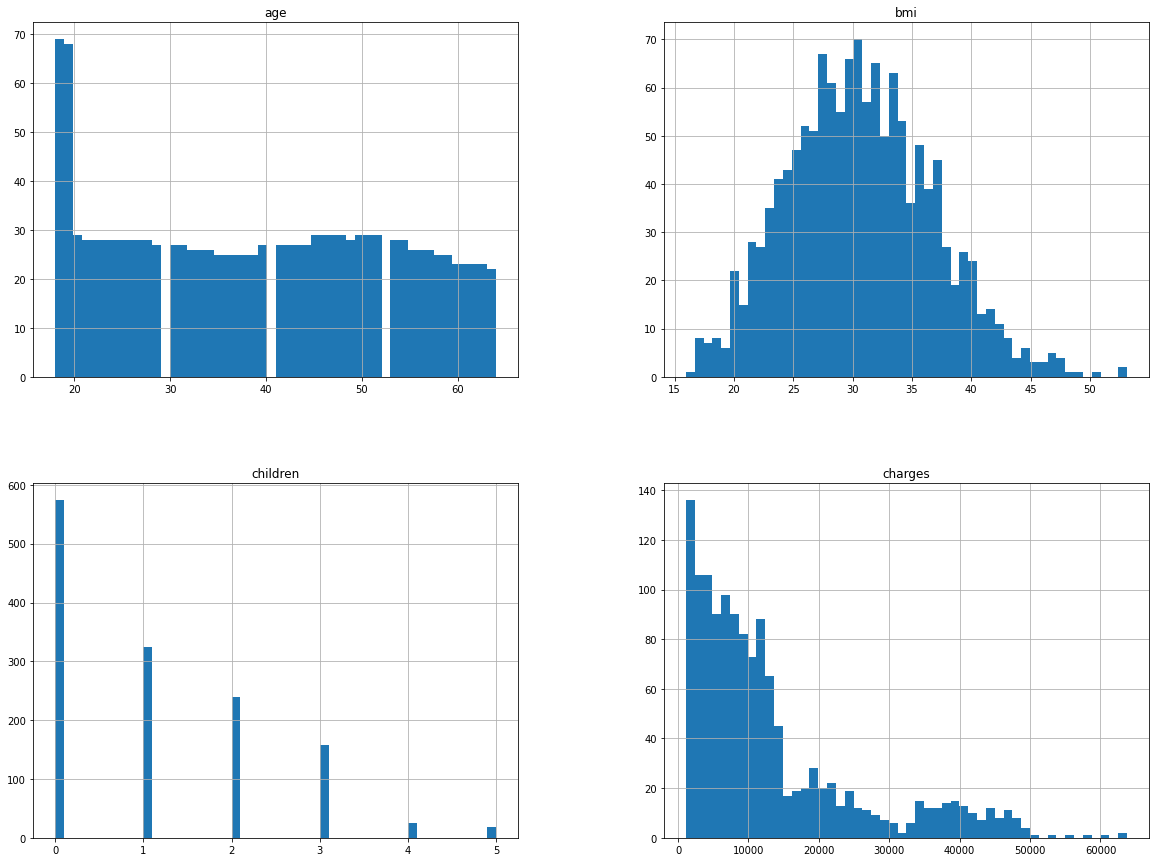

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

### Categorical Features

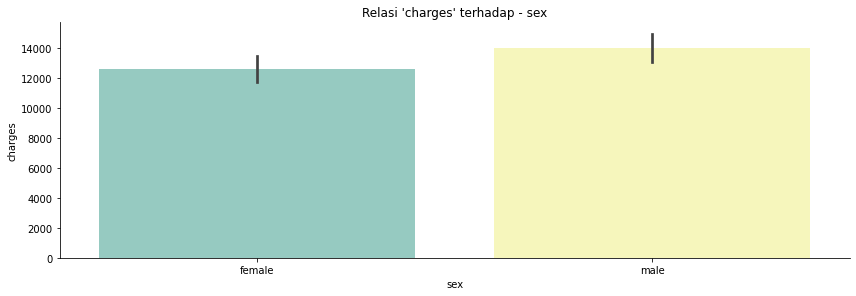

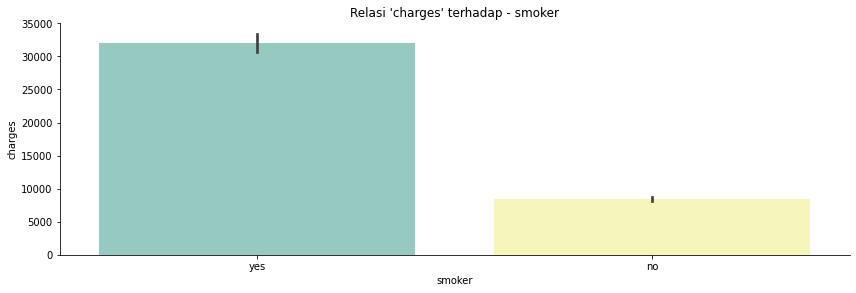

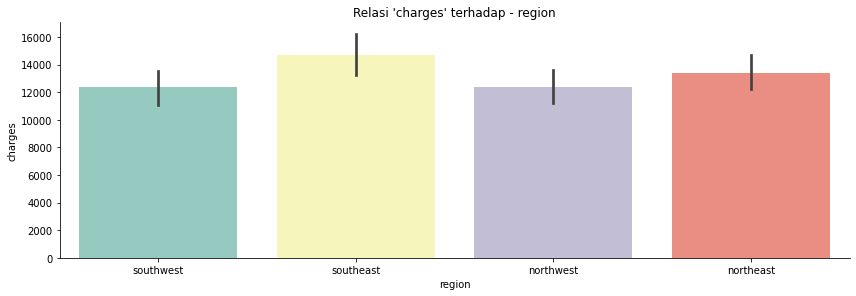

In [15]:
cat_features = df[categorical].columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Relasi 'charges' terhadap - {}".format(col))

### Numerical Features

#### Pairplot

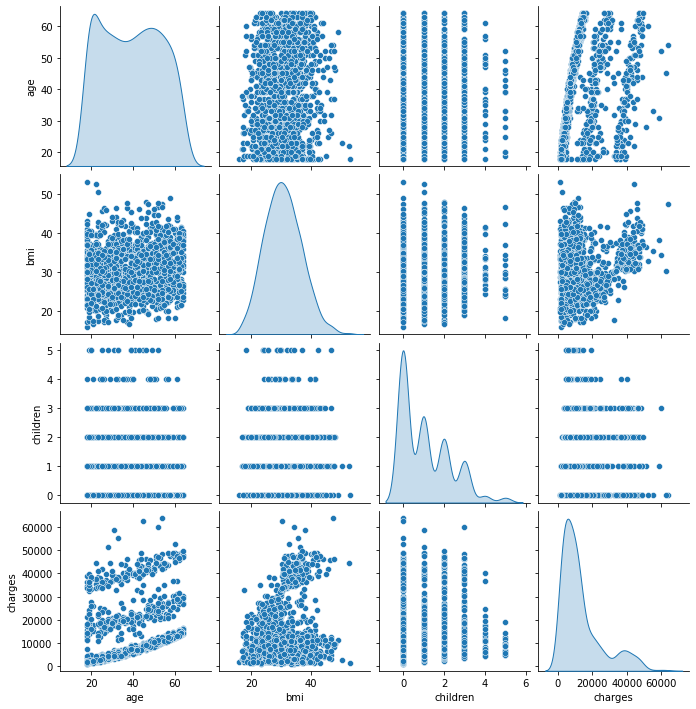

In [16]:
sns.pairplot(df, diag_kind = 'kde')

#### Heatmap

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

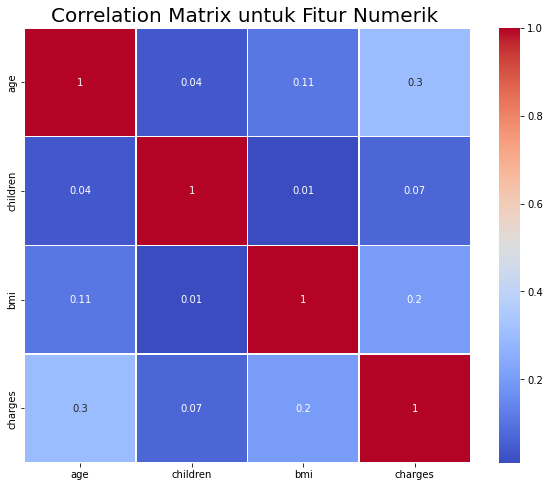

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [18]:
df.drop(['children'], inplace=True, axis=1)
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


## Data Preparation

### Encoding Fitur Kategori

In [19]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['sex'], prefix='sex', drop_first=True)],axis=1)
df = pd.concat([df, pd.get_dummies(df['smoker'], prefix='smoker', drop_first=True)],axis=1)
df = pd.concat([df, pd.get_dummies(df['region'], prefix='region', drop_first=True)],axis=1)
df.drop(['sex','smoker','region'], axis=1, inplace=True)
df

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,1,0,0,1
1,18,33.770,1725.55230,1,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0
3,33,22.705,21984.47061,1,0,1,0,0
4,32,28.880,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,1


### Train-Test-Split

In [20]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["charges"],axis =1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [21]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1338
Total # of sample in train dataset: 1204
Total # of sample in test dataset: 134


### Standarisasi 

In [22]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['age','bmi']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age,bmi
1309,0.142309,0.252655
817,-1.138471,1.067116
671,-0.711544,0.079790
249,-0.711544,-0.283393
981,-0.355772,-1.546638


In [23]:
X_train[numerical_features].describe().round(4)

,age,bmi
count,1204.0000,1204.0000
mean,-0.0000,-0.0000
std,1.0004,1.0004
min,-1.4942,-2.4467
25%,-0.9250,-0.7102
50%,0.0000,-0.0499
75%,0.8539,0.6711
max,1.7789,3.7316


## Model Development

In [24]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### K-Nearest Neighbor

In [25]:
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

### Random Forest

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### Boosting Algorithm

In [27]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi Model

### Scaling Fitur Numerik

In [28]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

### Metrik MSE

In [29]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

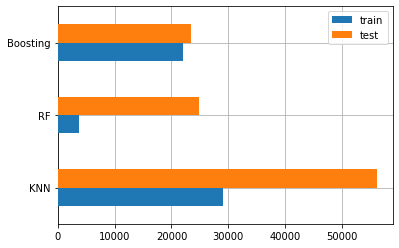

In [30]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### Uji Coba Prediksi

In [31]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
650,9800.88820,12620.1,10428.0,12225.2
319,4667.60765,8638.3,5880.2,7078.4
314,34838.87300,19377.2,34707.4,37617.5
150,5125.21570,7109.2,6232.5,8014.5
336,12142.57860,14009.7,16472.2,16118.1
970,10702.64240,9877.9,13187.8,12350.3
169,4827.90495,5965.8,3904.7,6920.6
684,4766.02200,3427.5,7599.1,7083.4
1097,1674.63230,4325.0,4114.6,6199.9
512,9361.32680,10706.3,9621.8,12346.9
